## Исследование объявлений о продаже квартир

### Описание проекта
В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

---

### <a id="stepend"> Оглавление</a>

- [Импорт библиотек, данных и получение первичной информации](#step1) </n>
- [Предобработка данных](#step2) </n>
- [Дополнительные вычисления](#step3) </n>
- [Исследовательский анализ данных](#step4) </n>
- [Общий вывод](#step5) </n>

---

### План исследования
- определить и исправить пропущенные значения;
- изменить тип данных там, где необходимо.

---

- посчитать цену квадратного метра;
- посчитать день недели, месяц и год публикации объявления;
- посчитать этаж квартиры; варианты — первый, последний, другой;
- посчитать соотношение жилой и общей площади, отношение площади кухни к общей.

---

- проанализиовать параметры - площадь, цена, число комнат и высота потолков. Построить графики;
- изучить время продажи квартиры. Построить график. Описать, сколько обычно времени занимает продажа квартиры;
- удалить аномальные значения;
- определить, какие факторы больше всего влияют на стоимость квартиры;
- выбрать 10 населенных пунктов с наибольшим количеством объявлений о продаже квартир. Посчитать среднюю цену квадратного метра и выделить пункты с самой высокой и самой низкой стоимостью жилья.
- определить, какая область входит в центр Санкт-Петеребурга. Построить график. Проанализирировать параметры в этой области. Выделить факторы, влияющие на стоимость квартир в центре.

---

- написать общий вывод.

### <a id='step1'>Импорт библиотек, данных и получение первичной информации</a>

In [3]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# прочитаем датасет
data = pd.read_csv('')

In [6]:
# получим первичное представление о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
# выведем первые 5 строк
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [8]:
# проверим датафрейм на наличие уникальных значений
for column in data.columns:
     print(data[column].value_counts())

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
14     986
4      986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
50       3
29       3
31       2
35       2
30       2
27       2
37       1
39       1
25       1
42       1
Name: total_images, dtype: int64
4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
4412094.0       1
6416000.0       1
4581000.0       1
34551000.0      1
6029433.0       1
Name: last_price, Length: 2978, dtype: int64
45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
45.85       1
44.18       1
59.83       1
127.20      1
23.55       1
Name: total_area, Length: 2182, dtype: int64
2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111

In [9]:
# количество пропущенных значений в датасете
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
# количество дубликатов в датасете
data.duplicated().sum()

0

##### Вывод

Наименование столбцов и содеражание:
- total_images - количество фотографий в объявлении;
- last_price - цена на момент снятия объявления с публикации;
- total_area - площадь квартиры в квадратных метрах;
- first_day_exposition - дата первой публикации объявления;
- rooms - количество комнат;
- ceiling_height - высота потолка;
- floor - этаж, на котором расположена квартира;
- floors_total - количество этажей в доме;
- living_area - жилая площадь в квадратных метрах;
- is_apartment - апартаменты;
- studio - студия;
- open_plan - сводобная планировка;
- kitchen_area - площадь кухни в квадратных метрах;
- balcony - количество балконов;
- locality_name - название населенного пункта;
- airports_nearest - расстояние до ближайшего аэропорта в метрах;
- cityCentres_nearest - расстояние до центра города в метрах;
- parks_around3000 - количество парков в радиусе 3км;
- parks_nearest - расстояние до ближайшего парка;
- ponds_around3000 - число водоемов в радиусе 3км;
- ponds_nearest - расстояние до ближайшего водоема;
- days_exposition - сколько дней было размещено объявление.

---

#### Обнаруженные проблемы в данных:
- в столбцах total_images, rooms, ceiling_height, floor, floors_total, parks_nearest, ponds_nearest, days_exposition, airports_nearest и cityCentres_nearest присутствуют аномальные значения;
- в столбцах ceiling_height, kitchen_area, living_area, airports_nearest, parks_around3000, ponds_around3000, ponds_nearest, days_exposition и rooms есть пропущенные значения; 
- в столбцах last_price и days_exposition есть дробные значения;
- в столбце citycentres_nearest одинаковые наименовая поселений записаны разными словами.

---

#### Рекомендации по предобработке:
- пропущенные значения в столбцах ceiling_height, kitchen_area, living_area можно заменить медианным значением в соответствии с количеством комнат;
- пропущенные значения в столбцах balcony, parks_around3000 и ponds_around3000 можно заменить нулевым значением, т.к пропуски в этих столбцах = отсутствие;
- пропущенные значения в столбцах parks+nearest, ponds_nearest, airports_nearest, cityCentres_nearest и days_exposition можно заменить специальными маркерами и не учитывать при рассчетах;
- привести наименования столбцов к нижнему регистру;
- изменить типы данных там, где необходимо;
- произвести категоризацию столбца locality_name.

### <a id='step2'>Предобработка данных</a>

In [12]:
# приведем названия столбцов к нижнему регистру
data.columns = [x.lower() for x in data.columns]

In [13]:
# приведем значения столбца locality_name к нижнему регистру
data['locality_name'] = data['locality_name'].str.lower()

In [14]:
# удалим пропущенные значения в locality_name, их всего 49 штук и они ни на что не повлияют
data.dropna(subset = ['locality_name'], inplace = True)

In [15]:
# в столбце rooms заменим нулевое количество комнат на 1
data['rooms'] = data['rooms'].replace(0, 1)

In [16]:
# заменим пропущенные значения нулем
cols = ['balcony', 'parks_around3000', 'ponds_around3000']
data[cols] = data[cols].fillna(0)

In [17]:
# заменим пропущенные значения в is_apartment на False
data['is_apartment'] = data['is_apartment'].fillna(False)

In [18]:
# заменим пропущенные значения специальным маркером
cols2 = ['airports_nearest', 'citycenters_nearest', 'parks_nearest', 'ponds_nearest', 'days_exposition']
data[cols2] = data[cols2].fillna(-777)

In [19]:
# расчитаем медианную высоту потолков в соответствии с количество комнат и заменим пропущенные значения
median_table = data.groupby(['rooms']).agg({'ceiling_height' : 'median'})
for room_count in median_table.index:
    data.loc[data['rooms'] == room_count, 'ceiling_height'] = data.loc[data['rooms'] == room_count, 'ceiling_height']\
    .fillna(median_table.loc[room_count, 'ceiling_height'])

In [20]:
# рассчитаем медианную жилую площадь по такому же принципу
median_table1 = data.groupby(['rooms']).agg({'living_area' : 'median'})
for room_count in median_table1.index:
    data.loc[data['rooms'] == room_count, 'living_area'] = data.loc[data['rooms'] == room_count, 'living_area']\
    .fillna(median_table1.loc[room_count, 'living_area'])

In [21]:
# для kitchen_area
median_table2 = data.groupby(['rooms']).agg({'kitchen_area' : 'median'})
for room_count in median_table2.index:
    data.loc[data['rooms'] == room_count, 'kitchen_area'] = data.loc[data['rooms'] == room_count, 'kitchen_area']\
    .fillna(median_table2.loc[room_count, 'kitchen_area'])

In [22]:
# удалим оставшиеся пропущенные значения
data.dropna(subset = ['ceiling_height', 'floors_total', 'living_area', 'kitchen_area'], inplace = True)

In [23]:
# проверим
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
citycenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

In [24]:
# приведем столбец first_day_exposition к формату даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

In [25]:
# изменим типы данных в столбцах на целочисленный
data = data.astype({'last_price' : int, 'floors_total' : int, 'balcony' : int, 'parks_around3000' : int, 
                   'ponds_around3000' : int, 'days_exposition' : int})

In [26]:
# проверим
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23564 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23564 non-null  int64         
 1   last_price            23564 non-null  int32         
 2   total_area            23564 non-null  float64       
 3   first_day_exposition  23564 non-null  datetime64[ns]
 4   rooms                 23564 non-null  int64         
 5   ceiling_height        23564 non-null  float64       
 6   floors_total          23564 non-null  int32         
 7   living_area           23564 non-null  float64       
 8   floor                 23564 non-null  int64         
 9   is_apartment          23564 non-null  bool          
 10  studio                23564 non-null  bool          
 11  open_plan             23564 non-null  bool          
 12  kitchen_area          23564 non-null  float64       
 13  balcony         

In [27]:
# заменим во всех словах 'ё' на 'е'
data['locality_name'] = data['locality_name'].str.replace('посёлок', 'поселок')

# все 'городской поселок' на 'поселок городского типа'
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')

In [28]:
# проверим
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары',
       'поселок городского типа янино-1', 'поселок парголово',
       'поселок мурино', 'ломоносов', 'сертолово', 'петергоф', 'пушкин',
       'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'посел

In [29]:
# выведем 5 строк
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,-777
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,11.0,2,поселок шушары,12817.0,18603.0,0,-777.0,0,-777.0,81
2,10,5196000,56.0,2015-08-20,2,2.60,5,34.3,4,False,...,8.3,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,9.5,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121


### <a id='step3'>Дополнительные вычисления</a>

In [30]:
# вычислим цену за квадртный метр
data['price_per_meter'] = round(data['last_price'] / data['total_area'])

In [31]:
# вычислим соотношение жилой площади к общей и кухни к общей
data['proportion_living'] = data['living_area'] / data['total_area']
data['proportion_kitchen'] = data['kitchen_area'] / data['total_area']

In [32]:
# проверим
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,proportion_living,proportion_kitchen
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,18863.0,16028.0,1,482.0,2,755.0,-777,120370.0,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,12817.0,18603.0,0,-777.0,0,-777.0,81,82921.0,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.60,5,34.3,4,False,...,21741.0,13933.0,1,90.0,2,574.0,558,92786.0,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,28098.0,6800.0,2,84.0,3,234.0,424,408176.0,0.283019,0.059748
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,31856.0,8098.0,2,112.0,1,48.0,121,100000.0,0.320000,0.410000


In [33]:
#добавим в таблицу столбцы с днем недели, месяцем и годом публикации каждого объявления

# день 
data['day_publication'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S').dt.weekday

# месяц
data['month_publication'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S').dt.month

# год
data['year_publication'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S').dt.year

In [34]:
# произведем категоризацию столбца floor - первый, последний, другой

def floor_category(row):
    if row['floor'] == 1:
        return "первый"
    elif row['floor'] == row['floors_total']:
        return "последний"
    return "другой"

# применим функцию
data['floor_category'] = data.apply(floor_category, axis = 1)

In [35]:
# проверим
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,proportion_living,proportion_kitchen,day_publication,month_publication,year_publication,floor_category
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755.0,-777,120370.0,0.472222,0.231481,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,-777.0,81,82921.0,0.460396,0.272277,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.60,5,34.3,4,False,...,2,574.0,558,92786.0,0.612500,0.148214,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,...,3,234.0,424,408176.0,0.283019,0.059748,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121,100000.0,0.320000,0.410000,1,6,2018,другой


### <a id='step4'>Иccледовательский анализ данных</a>

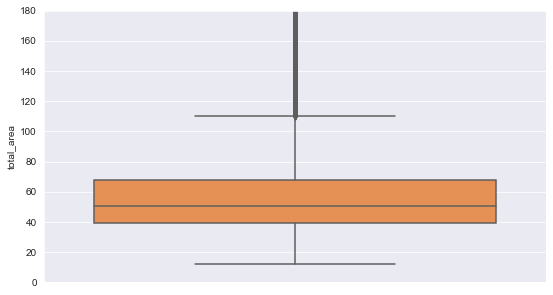

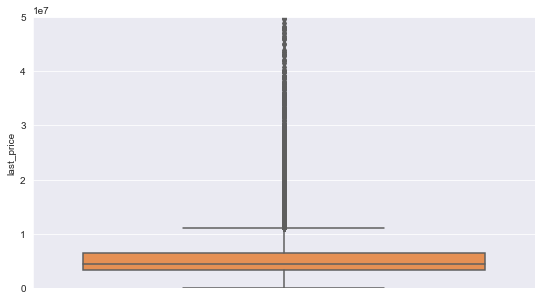

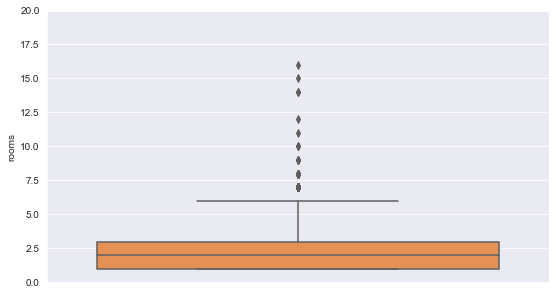

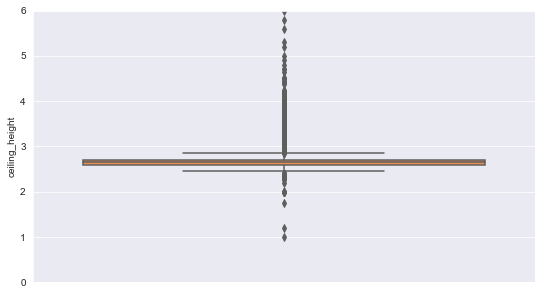

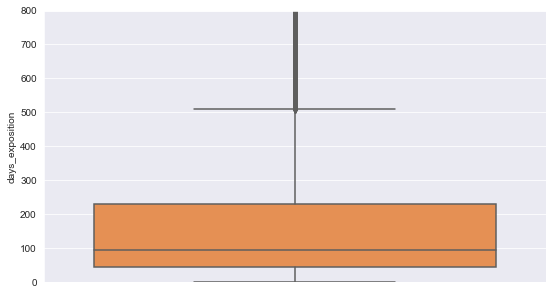

,total_area,last_price,rooms,ceiling_height,days_exposition
count,20393.000000,2.039300e+04,20393.000000,20393.000000,20393.000000
mean,58.818781,6.262448e+06,2.032364,2.714440,180.744667
std,33.995192,1.088732e+07,1.035526,0.974287,219.737673
min,12.000000,1.219000e+04,1.000000,1.000000,1.000000
25%,39.500000,3.400000e+06,1.000000,2.600000,45.000000
50%,50.800000,4.500000e+06,2.000000,2.650000,95.000000
75%,67.800000,6.500000e+06,3.000000,2.700000,231.000000
max,900.000000,7.630000e+08,16.000000,100.000000,1580.000000


In [36]:
# построим боксплоты для столбцов total_area, last_price, rooms и ceiling_height

# список столбцов для построения боксплотов
plots=data[['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']].query('days_exposition != -777')

dict_for_boxplot = {'total_area' : [(0, 180)],
                 'last_price' : [(0, 0.5e8)],
                 'rooms' : [(0, 20)],
                 'ceiling_height' : [(0, 6)],
                 'days_exposition' : [(0, 800)]}

sns.set_style("darkgrid")

for column in plots:
        plt.figure(figsize=(9, 5))
        sns.boxplot(data=plots, y=column, orient='v', palette='Oranges')
        plt.ylim(dict_for_boxplot[column][0])
        plt.show()
        
# призовем describe для точности
plots.describe()

#### Выводы по графикам:
- По боксплоту общей площади: медианное значение находится на отметке 52(м2), 25-й перцентиль на отметке 40(м2), 75-й перцентиль на отметке 70(м2). Аномально-высокие значения начинаются на отметке 115(м2), аномально-низкие значения начинаются на отметке 15(м2);
- По боксплоту цены: аномально-высокие значения начинаются на отметке 13 млн.р. Медианная цена за квартиру составляет 4.7 млн.р. 75-й перцентиль - 6.8 млн.р, 25-й перцентиль - 3.4 млн.р;
- По боксплоту количества комнат: медианное количество комнат - 2 комнаты. 75-й перцентиль - 3 комнаты, 25-й перцентиль - 1 комната. Аномально-высокие значения начинаются от шести комнат;
- По боксплоту высоты потолка: медианная высота потолка 2.7 м. 75-й перцентиль - 2.7 м, 25-й перцентиль - 2.6 м. Аномально низкие значения начинаются на отметке 2.4 м, аномально-высокие на отметке 2.9 м.
- По боксплоту времени продажи квартир: медианное время продажи квартиры - 95 дней, 75-й перцентиль - 231 день, 25-й перцентиль - 45 дней. Аномально-высокие значения те, когда квартиры была продана за более, чем 420 дней.

#### Обработка аномальных значений

In [37]:
data = data.query("(15 <= total_area <= 115) and (last_price <= 13000000) and (rooms <= 6) and (2.4 <= ceiling_height <= 2.9) and (40 <= days_exposition <= 420)")

# проверка
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11581 entries, 1 to 23695
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          11581 non-null  int64         
 1   last_price            11581 non-null  int32         
 2   total_area            11581 non-null  float64       
 3   first_day_exposition  11581 non-null  datetime64[ns]
 4   rooms                 11581 non-null  int64         
 5   ceiling_height        11581 non-null  float64       
 6   floors_total          11581 non-null  int32         
 7   living_area           11581 non-null  float64       
 8   floor                 11581 non-null  int64         
 9   is_apartment          11581 non-null  bool          
 10  studio                11581 non-null  bool          
 11  open_plan             11581 non-null  bool          
 12  kitchen_area          11581 non-null  float64       
 13  balcony         

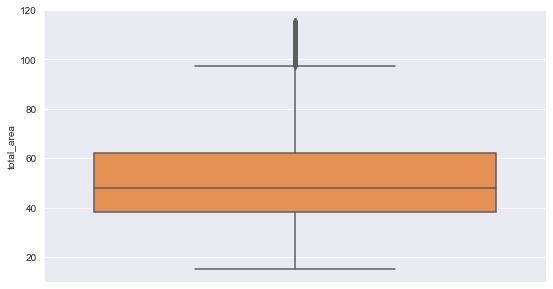

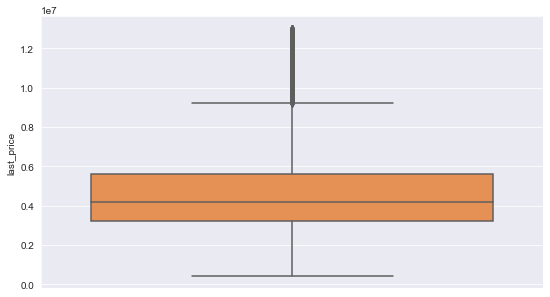

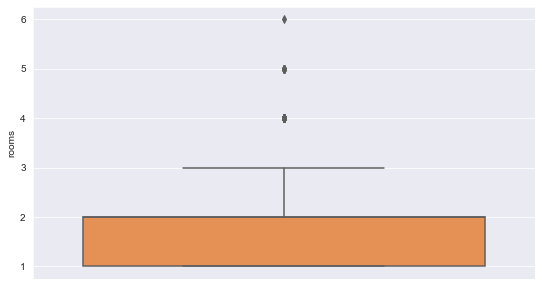

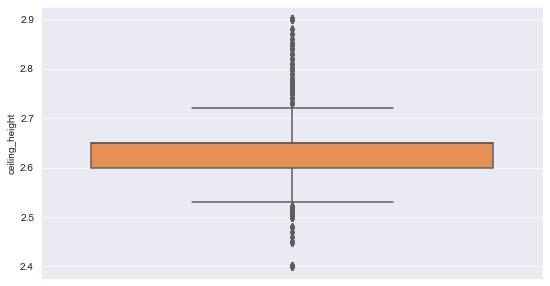

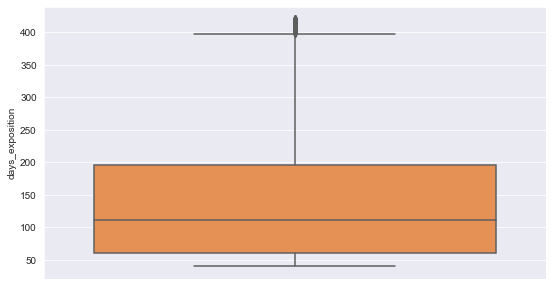

,total_area,last_price,rooms,ceiling_height,days_exposition
count,11581.000000,1.158100e+04,11581.000000,11581.000000,11581.000000
mean,51.733207,4.623163e+06,1.882048,2.625888,143.249460
std,17.224306,2.167364e+06,0.850220,0.084564,98.401853
min,15.000000,4.300000e+05,1.000000,2.400000,40.000000
25%,38.300000,3.200000e+06,1.000000,2.600000,61.000000
50%,47.800000,4.200000e+06,2.000000,2.650000,111.000000
75%,62.000000,5.600000e+06,2.000000,2.650000,196.000000
max,115.000000,1.300000e+07,6.000000,2.900000,420.000000


In [38]:
# посмотрим на распределения значений после удаления аномалий

# список столбцов для построения боксплотов
plots_clean=data[['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']]

sns.set_style("darkgrid")

for column in plots_clean:
        plt.figure(figsize=(9, 5))
        sns.boxplot(data=plots_clean, y=column, orient='v', palette='Oranges')
        plt.show()
        
# призовем describe для точности
plots_clean.describe()

#### Обнаруженные аномалии были успешно удалены.

#### Определение факторов, влияющих на стоимость квартиры

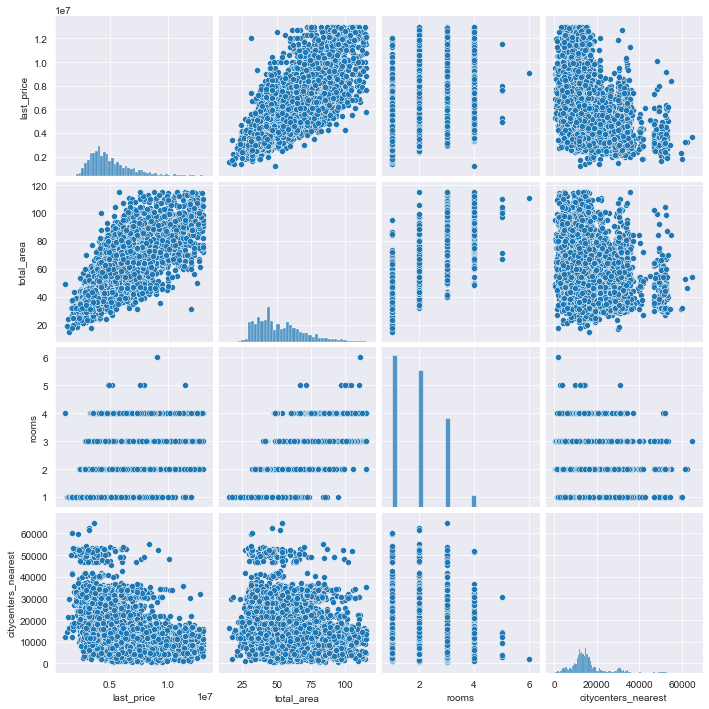

In [39]:
# определим зависимость цены квартиры от квадратного метра, числа комнат и удаленности от центра

# столбцы для построения графиков и корреляции
ltrc = data[['last_price', 'total_area', 'rooms', 'citycenters_nearest']].query('citycenters_nearest != -777')

# нарисуем графики
sns.pairplot(ltrc)

In [40]:
ltrc.corr()

,last_price,total_area,rooms,citycenters_nearest
last_price,1.000000,0.790018,0.494360,-0.315844
total_area,0.790018,1.000000,0.792664,-0.092830
rooms,0.494360,0.792664,1.000000,-0.046998
citycenters_nearest,-0.315844,-0.092830,-0.046998,1.000000


- Зависимость между стоимостью квартиры и площадью квартиры выражена сильно - 0.8;
- Зависимость между стоимостью квартиры и количеством комнат выражена слабее, чем ожидалось - 0.5;
- Зависимость между стоимостью квартиры и удаленностью от центра имеет слабо-выраженную отрицательную связь - 0.31. Можно предположить, что правило: ближе к центру - выше стоимость, здесь не работает.

In [41]:
# посмотрим на зависимость стоимости квартиры от этажа, на котором она находится

# функция для категоризации 
def numbers_floor(floor_category):
    if 'первый' in floor_category:
        return '0'
    if 'последний' in floor_category:
        return '1'
    return '2'

# новый столбец
data['floor_category_numbers'] = data['floor_category'].apply(numbers_floor).astype('int')

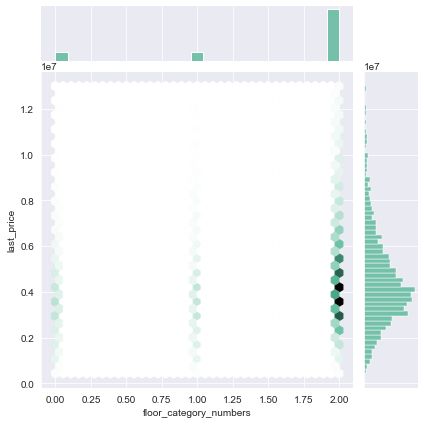

In [42]:
# столбцы для построения графика и корреляции
pcn = data[['last_price', 'floor_category_numbers']]

# график
sns.jointplot(data = pcn, x='floor_category_numbers', y='last_price', kind="hex", color="#4CB391")

In [43]:
pcn.corr()

,last_price,floor_category_numbers
last_price,1.000000,0.179135
floor_category_numbers,0.179135,1.000000


- Завимость между стоимостью квартиры и этажом на котором находится квартира, выражена слабо. 

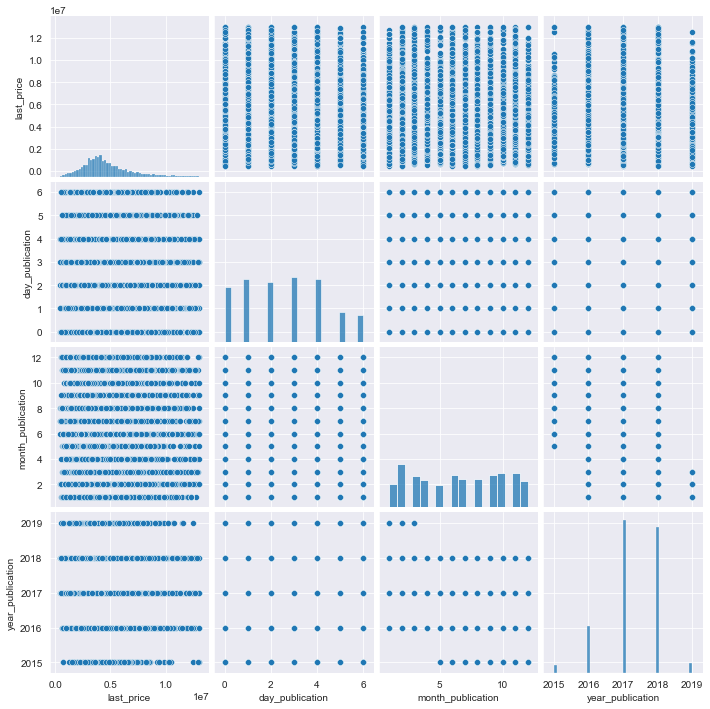

In [44]:
# определим зависимость стоимости квартиры от дня, месяца и года размещения объявления

# столбцы для построения графиков и корреляции
dmy = data[['last_price', 'day_publication', 'month_publication', 'year_publication']]

sns.pairplot(dmy)

In [45]:
dmy.corr()

,last_price,day_publication,month_publication,year_publication
last_price,1.000000,-0.010215,0.016979,-0.009223
day_publication,-0.010215,1.000000,-0.005924,0.011121
month_publication,0.016979,-0.005924,1.000000,-0.195585
year_publication,-0.009223,0.011121,-0.195585,1.000000


- Зависимость между стоимостью стоимостью квартиры и годом, месяцев и днем публикации объявления во всех случаях имеет слабую, практически несущественную связь.

In [47]:
# посчитаем среднуюю цену за квадратный метр по топ-10 локациям

# топ-10 локаций по количеству объявлений
top_10_locations = data['locality_name'].value_counts().head(10).index

# срез из общей таблицы по топ-10 локациям
city_10 = data.query('locality_name in @top_10_locations')

# сводная для рассчета средней цены за квадратный метр
city_10.pivot_table(index = 'locality_name', values = 'price_per_meter', aggfunc= 'mean') \
.sort_values(by = 'price_per_meter', ascending = False).round()

,price_per_meter
locality_name,
санкт-петербург,103967.0
пушкин,98070.0
деревня кудрово,92877.0
поселок парголово,89074.0
поселок мурино,85265.0
поселок шушары,78126.0
колпино,74174.0
всеволожск,66979.0
гатчина,66781.0


- Самая высокая цена за квадратный метр в Санкт-Петербурге - 103967 т.р;
- Самая низкая цена за квадратный метр в Выборге - 56121 т.р.

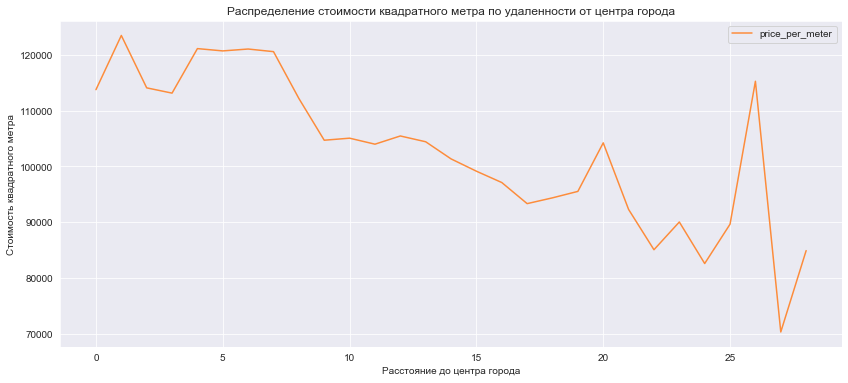

In [48]:
# посчитаем среднюю стоимость квадратного метра в Санкт-Петербурге по удаленности от центра и определим область, входящуюю в центр

# переведем метры в столбце 'cityCenters_nearest' в километры и запишем в отдельный столбец 'km'
data['city_centers_nearest_km'] = (data.query('citycenters_nearest != -777')['citycenters_nearest'] / 1000).astype('int')

# сводная для расчета средней цены за м**2 
pivot_table = data.query('locality_name == "санкт-петербург"').groupby(['city_centers_nearest_km']).agg({'price_per_meter' : 'mean'})

# построим график
plt.figure(figsize=(14, 6))
sns.lineplot(data=pivot_table, palette='Oranges')
plt.title('Распределение стоимости квадратного метра по удаленности от центра города')
plt.xlabel('Расстояние до центра города')
plt.ylabel('Стоимость квадратного метра')
plt.show();

- Жилье, находится в центре, если принадлежат интервалу от 0 до 3 км;
- От 3 до 6 км проходит следующая область;
- После 6 км график стоимость за квадратный метр постепенно уменьшается, лишь с небольшим всплеском в промежетке от 25 до 27 км.

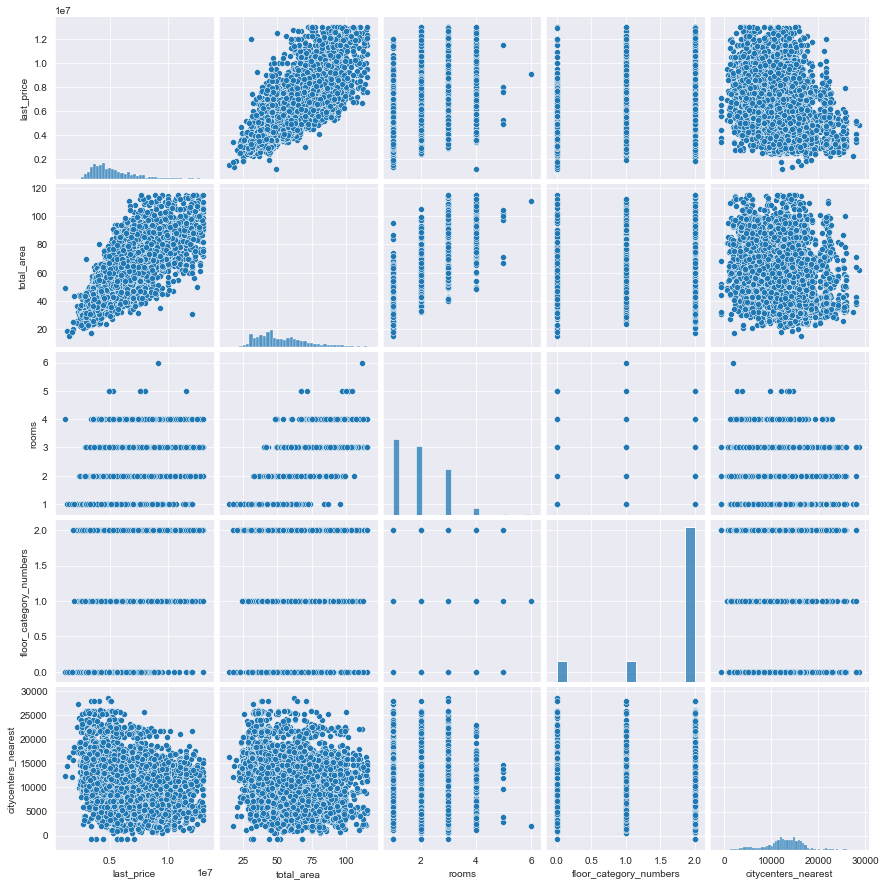

In [49]:
# определим зависимость стоимости квартиры в Санкт-Петербурге от цены, количества комнат, этажа и удаленности от центра

# срез по Питеру
data_spb = data.query('locality_name == "санкт-петербург"')

# столбцы для построения графиков и матрицы корреляции
ltrc_spb = data_spb[['last_price', 'total_area', 'rooms', 'floor_category_numbers', 'citycenters_nearest']]

sns.pairplot(ltrc_spb)

In [50]:
# матрица корреляций
ltrc_spb.corr()

,last_price,total_area,rooms,floor_category_numbers,citycenters_nearest
last_price,1.000000,0.809294,0.494295,0.121565,-0.300358
total_area,0.809294,1.000000,0.785771,0.022453,-0.139104
rooms,0.494295,0.785771,1.000000,-0.084021,-0.099732
floor_category_numbers,0.121565,0.022453,-0.084021,1.000000,0.054716
citycenters_nearest,-0.300358,-0.139104,-0.099732,0.054716,1.000000


- Зависимость цены квартиры в Санкт-Петербурге от площади выражена сильна - 0.8;
- Зависимость цены квартиры в Санкт-Петербурге от количества комнат выражена умеренно - 0.49;
- Завимисомть цены квартиры от этажа выражена слабо - 0.12;
- Завимиость цены квартиры от удаленности от центра выражена слабо-отрицательно - 0.30.

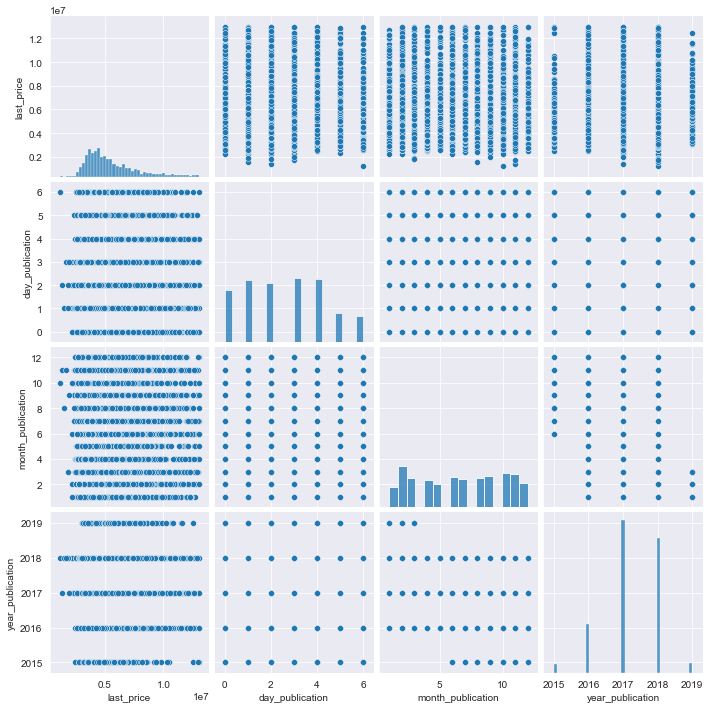

In [51]:
# определим зависимость цены квартиры в Санкт-Петербурге от дня, месяца и года публикации объявления

# столбцы для построения графиков и матрицы корреляции
dmy_spb = data_spb[['last_price', 'day_publication', 'month_publication', 'year_publication']]

# графики
sns.pairplot(dmy_spb)

In [52]:
# матрица корреляций
dmy_spb.corr()

,last_price,day_publication,month_publication,year_publication
last_price,1.000000,-0.006377,0.003357,0.037242
day_publication,-0.006377,1.000000,-0.022619,0.025500
month_publication,0.003357,-0.022619,1.000000,-0.190483
year_publication,0.037242,0.025500,-0.190483,1.000000


- Зависимость цены квартиры в Санкт-Петерубрге от момента публикации объявления во всех трех случаях выражена слабо.

#### Анализ квартир в центре города

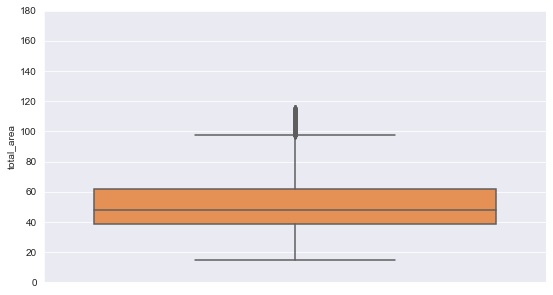

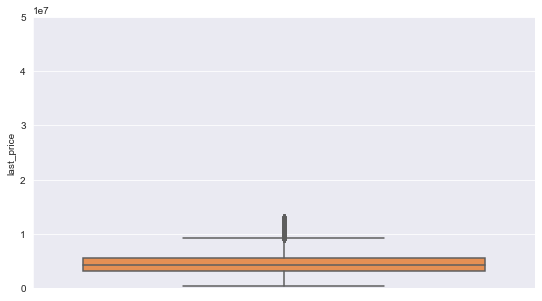

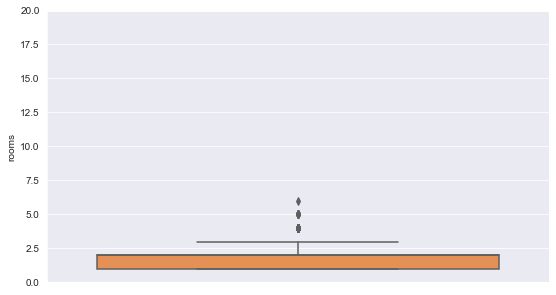

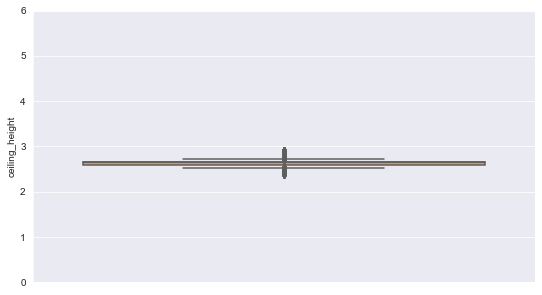

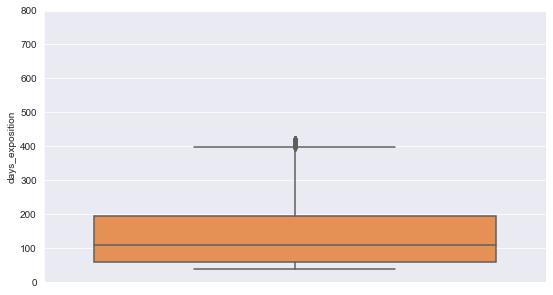

,total_area,last_price,rooms,ceiling_height,days_exposition
count,11581.000000,1.158100e+04,11581.000000,11581.000000,11581.000000
mean,51.733207,4.623163e+06,1.882048,2.625888,143.249460
std,17.224306,2.167364e+06,0.850220,0.084564,98.401853
min,15.000000,4.300000e+05,1.000000,2.400000,40.000000
25%,38.300000,3.200000e+06,1.000000,2.600000,61.000000
50%,47.800000,4.200000e+06,2.000000,2.650000,111.000000
75%,62.000000,5.600000e+06,2.000000,2.650000,196.000000
max,115.000000,1.300000e+07,6.000000,2.900000,420.000000


In [53]:
# построим боксплоты для столбцов total_area, last_price, rooms и ceiling_height для квартир в центре

# срез по удаленности от центра
data.query('0 <= city_centers_nearest_km <= 3')

# список столбцов для построения боксплотов
plots_centers = data[['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']]

dict_for_boxplot = {'total_area' : [(0, 180)],
                 'last_price' : [(0, 0.5e8)],
                 'rooms' : [(0, 20)],
                 'ceiling_height' : [(0, 6)],
                 'days_exposition' : [(0, 800)]}

sns.set_style("darkgrid")

for column in plots_centers:
        plt.figure(figsize=(9, 5))
        sns.boxplot(data=plots_centers, y=column, orient='v', palette='Oranges')
        plt.ylim(dict_for_boxplot[column][0])
        plt.show()
        
# призовем describe для точности
plots_centers.describe()

#### Выводы по графикам:
- По боксплоту площади квартиры: медианная площадь квартиры в центре - 65(м2). 25-й перцентиль - 49(м2), 75-перцентиль - 82(м2);
- По боксплоту цены квартиры: медианная цена за квартиру в центре - 7.3 млн.р. 25-й перцентиль - 5.4 млн.р, 75-й перцентиль - 8.9 млн.р;
- По боксплоту количества комнат - медианное количество комнат в центре - 2 комнаты. 25-й перцентиль - 2 комнаты, 75-й перцентиль - 3 комнаты;
- По боксплоту высоты потолков - медианная высота потолков в центре - 2.7 м. 25-й перцентиль - 2.6 м, 75-й пернцентиль - 2.8 м;
- По боксплоту врмени продажи - мединное время продажи квартиры в центре - 112 дней. 25-й пернцетиль - 77 дней, 75-й перцентиль - 212 дней.

#### Определение факторов, влияющих на стоимость квартиры в центре

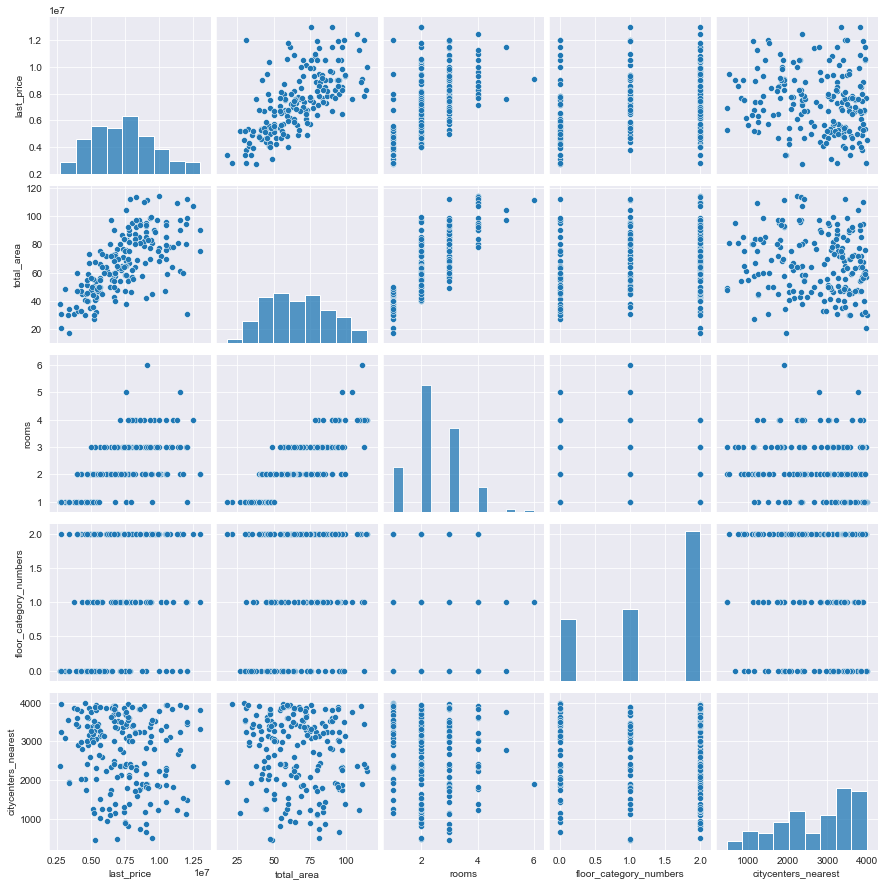

In [54]:
# определим зависимость стоимости квартиры в центре от цены, количества комнат, этажа и удаленности от центра

# срез по центру
data_center = data.query('0 <= city_centers_nearest_km <= 3')

# столбцы для построения графиков и матрицы корреляции
ltrc_spb_center = data_center[['last_price', 'total_area', 'rooms', 'floor_category_numbers', 'citycenters_nearest']]

sns.pairplot(ltrc_spb_center)

In [55]:
# матрица корреляции
ltrc_spb_center.corr()

,last_price,total_area,rooms,floor_category_numbers,citycenters_nearest
last_price,1.000000,0.669673,0.518036,0.167024,-0.138313
total_area,0.669673,1.000000,0.783481,0.118104,-0.112219
rooms,0.518036,0.783481,1.000000,0.055060,-0.076425
floor_category_numbers,0.167024,0.118104,0.055060,1.000000,0.049364
citycenters_nearest,-0.138313,-0.112219,-0.076425,0.049364,1.000000


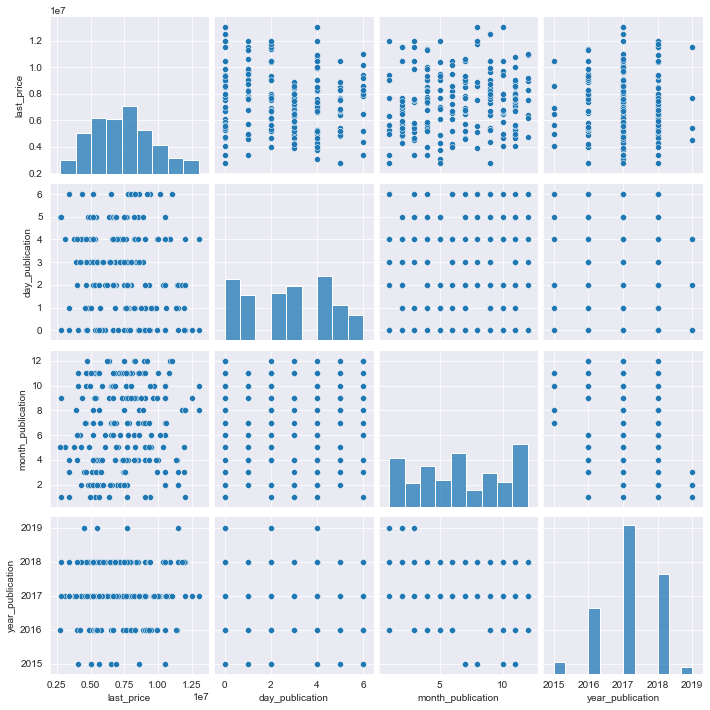

In [56]:
# определим зависимость цены квартиры в центре от дня, месяца и года публикации объявления

# столбцы для построения графиков и матрицы корреляции
dmy_spb_center = data_center[['last_price', 'day_publication', 'month_publication', 'year_publication']]

# графики
sns.pairplot(dmy_spb_center)

In [57]:
# матрица корреляции
dmy_spb_center.corr()

,last_price,day_publication,month_publication,year_publication
last_price,1.000000,-0.123697,0.109545,0.004377
day_publication,-0.123697,1.000000,0.060953,-0.042726
month_publication,0.109545,0.060953,1.000000,-0.157977
year_publication,0.004377,-0.042726,-0.157977,1.000000


- Зависимость между стоимостью квартиры в центре и площадью квартиры выражена сильно - 0.67;
- Зависимость между стоимостью квартиры в центре и количеством комнат выражена средне - 0.51;
- Зависимость между стоимостью квартиры в центре и этажом, на котором находится квартира, имеет слабую, практически отсутствующую положительную корреляцию - 0.17;
- Зависимость между стоимостью квартиры в центре и удаленностью от центра имеет слабо-выраженную отрицательную связь - -0.13 В теории, можно предположить, что чем дальше квартира расположена от центра, тем она дешевле;
- Зависимость между стоимостью квартиры в центре и моментом публикации объявления, во всех трех случаях выражена слабо.

#### Сравнение статистик в центре и по всему городу:
- Зависимость цены квартиры от площади в Санкт-Петербурге и в центре в обоих случаях выражена сильно - 0.8 vs 0.67. Сильнее зависимость выражена в Санкт-Петерубрге;
- Зависимость цены квартиры от количества комнат в Санкт-Петерубрге и в центре в обоих случаях выражена умеренно - 0.51 vs 0.49. Сильнее зависимость выражена в центре;
- Зависимость цены квартиры от этажа в Санкт-Петербурге и в центре в обоих случаях выражена слабо - 0.17 и 0.12. Сильнее зависимость выражена в центре;
- Зависимость цены квартиры от удаленности от центре в Санкт-Петербурге и в центре выражена по-разному. В Питере - 0.30, в центре Питера - -0.13;
- Зависимость стоимости квартиры от момента публикации в обоих случаях выражена слабо.

#### На этом этапе выполены все необходимые аналитические операции.

### <a id='step5'>Общий вывод</a>

Задачей проекта было установить установить параметры выборки для автоматизации системы определения рыночной стоимости недвижимости.

#### Топ-10 населенных пунктов по количеству объявлений:
- Санкт-Петербург
- Пушкин
- Деревня Кудрово
- Поселок Парголово
- Поселок Мурино
- Поселок Шушары
- Колпино
- Всеволожск
- Гатчина
- Выборг	

---

#### Основные параметры, влияющие на стоимость квартиры:
- площадь квартиры;
- количество комнат;
- удаленность от центра.

---

- Самая высокая цена за квадратный метр в Санкт-Петербурге - 103570 т.р;
- Самая низкая цена за квадратный метр в Выборге - 55941 т.р

---

- Центром города является область в пределах от 0 до 3 км.

---
Факторы, влияющие на стоимость квартиры в центре Санкт-Петербурга и в остальном городе практически идентичны, за исключением удаленности от центра. В Санкт-Петербурге слабая положительная связь - 0.30, в центре Санкт-Петербурга слабая отрицательная связь - -0.13. Взаимосвязь между датой публикации объявления в обоих случаях выражена слабо и не влияет на ценообразование квартиры.